In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
 
def get_created_at(json_path):
    if os.path.exists(json_path):
        with open(json_path, "r") as file:
            data = json.load(file)
        return data['created_at'] #data.get("created_at", None)
    else:
        return None
 

In [3]:
"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        #print ('Has true not misinformation')
        label = None
    else:
        #print('No annotations')
        label = None
           
    return label


In [4]:
import os
# Create a DataFrame from the lists
df = pd.DataFrame(columns=['TweetID', 'IsRumour', 'IsTrue','Path','CreatedAt'])
df
count=0
Incidentdirectory = './Data/PHEME_veracity/all-rnr-annotated-threads/'
for subdirectoryIncident in os.listdir(Incidentdirectory):
    subdirectoryIncident_path = os.path.join(Incidentdirectory, subdirectoryIncident)
    if os.path.isdir(subdirectoryIncident_path):
        rmourOrnonrumour=['rumours','non-rumours']
        for rumourLabel in rmourOrnonrumour:
            directory =subdirectoryIncident_path+'/'+rumourLabel
            #directory = './Data/PHEME_veracity/all-rnr-annotated-threads/ottawashooting-all-rnr-threads/'+rumourLabel
            for subdirectory in os.listdir(directory):
                    subdirectory_path = os.path.join(directory, subdirectory)
                    if os.path.isdir(subdirectory_path):
                        count=count+1
                        #print("Subdirectory: ",count, subdirectory_path )
                        # Open and read the JSON file
                        file_path=subdirectory_path+'/annotation.json'
                        with open(file_path, 'r') as file:
                            data = json.load(file)
                            my_dict = {}
                            for key, value in data.items():
                                my_dict[key] = value
                            

                            # Create a dictionary with the data for the new row
                            new_row_data = {
                                'TweetID': subdirectory,
                                'IsRumour':  my_dict['is_rumour'],
                                'IsTrue':convert_annotations(my_dict) ,#'true' if my_dict['is_rumour']=='nonrumour' else convert_annotations(my_dict) ,
                                'Path':subdirectory_path
                            }
                            # Convert the dictionary to a DataFrame
                            new_row_df = pd.DataFrame(new_row_data, index=[0])
                            # Concatenate the new row DataFrame with the original DataFrame
                            df = pd.concat([df, new_row_df], ignore_index=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
...,...,...,...,...,...
6420,544521260840267776,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6421,544521433473634304,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6422,544521788777304064,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
6423,544521880661950464,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN


In [5]:
# Get the value counts of 'IsTrue'
value_counts = df['IsTrue'].value_counts()

print("Value Counts of 'IsTrue':")
print(value_counts)

Value Counts of 'IsTrue':
true          1067
unverified     697
false          638
Name: IsTrue, dtype: int64


In [6]:
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].unique()
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].value_counts()
df=df[df['IsTrue'].isin(['true','false'])]
#df['IsTrue'] = df['IsTrue'].str.lower().replace({'true': True, 'false': False})
# Convert 'IsTrue' column to boolean
#df['IsTrue'] = df['IsTrue'].map({'true': True, 'false': False})
df = df.reset_index(drop=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN


In [6]:
df.iloc[0]['Path']

'./Data/PHEME_veracity/all-rnr-annotated-threads/charliehebdo-all-rnr-threads/rumours\\552783238415265792'

In [7]:
from datetime import datetime

# # Iterate through the DataFrame and add Created At
for index, row in df.iterrows(): # df[:1000].iterrows(): 
    #fileName=df.iloc[index]['Path']+'/structure.json'
    file_path_sourceTweet=df.iloc[index]['Path']+'/source-tweets/'+df.iloc[index]['TweetID']+'.json'
    with open(file_path_sourceTweet, 'r') as fileSource:
        data_Source = json.load(fileSource)
    # Extract the value of the 'created_at' field
    created_at_str  = data_Source['created_at']
    # Convert the string to a datetime object
    created_at_datetime = datetime.strptime(created_at_str, '%a %b %d %H:%M:%S +0000 %Y')
    df.iloc[index]['CreatedAt']=created_at_datetime
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:07:51
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:08:09
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:09:50
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:11:16
...,...,...,...,...,...
1700,544520273718812672,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:52:04
1701,544520654431981568,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:53:35
1702,544520932405284864,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:54:41
1703,544521141335764992,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:31


In [25]:
# Create a DataFrame from the lists
dfAllTweets = pd.DataFrame(columns=['RootTweetID', 'IsRumour', 'IsTrue','Path','RootCreatedAt','FromTweetID','ToTweetID' ,'FromCreatedTime','ToCreatedTime','Participant_count','UserID'])
dfAllTweets
import pandas as pd
encoding = 'utf-8'
# # Iterate through the DataFrame and add Created At
#for index, row in df.iterrows(): # df[:1000].iterrows():
fileName=df.iloc[0]['Path']+'/structure.json'
with open(fileName, 'r', encoding=encoding) as file:
    json_data = json.load(file)
# # Your JSON data
# json_data = {
#     "552783667052167168": {
#         "552785374507175936": {
#             "552786226546495488": {
#                 "552789345628069888": []
#             }
#         },
#         "552789153403109376": [],
#         "552790281276628992": [],
#         "552792862610694144": [],
#         "552943855021330432": []
#     }
# }

# Function to flatten the JSON tree structure and create a DataFrame
def flatten_json_tree(json_data, parent=None):
    data = []
    for key, value in json_data.items():
        data.append({"From": parent, "To": key})
        if isinstance(value, dict):
            data.extend(flatten_json_tree(value, parent=key))
    return data

for index, row in df.iterrows(): # df[:1000].iterrows():
    fileName=df.iloc[index]['Path']+'/structure.json'
    with open(fileName, 'r', encoding=encoding) as file:
        json_data = json.load(file)
    # Create DataFrame
    dfStructure = pd.DataFrame(flatten_json_tree(json_data))
    dfStructure.dropna(inplace=True)
    number_of_participants=set()
    count=0
    for indexTweet, rowTweet in dfStructure.iterrows():
        # New data for the row
        TweetfileName=df.iloc[index]['Path']+'/reactions/'+rowTweet['From']+'.json'
        
        if row['TweetID']!= rowTweet['From']:
            with open(TweetfileName, 'r', encoding=encoding) as file:
                json_data_tweet = json.load(file)
        TweetfileName=df.iloc[index]['Path']+'/reactions/'+rowTweet['To']+'.json'
        #print(TweetfileName)
        with open(TweetfileName, 'r', encoding=encoding) as file:
            json_data_tweet_to = json.load(file)
            Receiver=json_data_tweet_to['user']['id']

        if Receiver not in number_of_participants:
            number_of_participants.add(Receiver)
            count=count+1
            #number_of_participants.append(count)                    
            FromCreatedTime=row['CreatedAt'] if row['TweetID']== rowTweet['From'] else  datetime.strptime( json_data_tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
            new_data = {'RootTweetID': row['TweetID'],'IsRumour':row['IsRumour'],'IsTrue':row['IsTrue'],
                       'Path':row['Path'],'RootCreatedAt':row['CreatedAt'], 'FromTweetID': rowTweet['From'],
                       'ToTweetID':rowTweet['To'],'FromCreatedTime':FromCreatedTime,'ToCreatedTime':  datetime.strptime( json_data_tweet_to['created_at'], '%a %b %d %H:%M:%S +0000 %Y'),
                       'Participant_count':len(number_of_participants),'UserID':json_data_tweet_to['user']['id']
                       }

            dfAllTweets = pd.concat([dfAllTweets, pd.DataFrame([new_data])], ignore_index=True)



#Display DataFrame
dfAllTweets


,RootTweetID,IsRumour,IsTrue,Path,RootCreatedAt,FromTweetID,ToTweetID,FromCreatedTime,ToCreatedTime,Participant_count,UserID
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552787794503143424,2015-01-07 11:06:08,2015-01-07 11:24:15,1,202572421
1,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552787794503143424,552804911797530625,2015-01-07 11:24:15,2015-01-07 12:32:16,2,102149847
2,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552789647966109696,2015-01-07 11:06:08,2015-01-07 11:31:37,3,239943362
3,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552791411053973505,2015-01-07 11:06:08,2015-01-07 11:38:37,4,2903715212
4,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552793152390955009,2015-01-07 11:06:08,2015-01-07 11:45:32,5,2911191121
...,...,...,...,...,...,...,...,...,...,...,...
14208,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522690728849409,2014-12-15 15:55:37,2014-12-15 16:01:40,12,203301376
14209,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522722563194880,2014-12-15 15:55:37,2014-12-15 16:01:48,13,1630712797
14210,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522765177352192,2014-12-15 15:55:37,2014-12-15 16:01:58,14,1322192436
14211,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522905082540032,2014-12-15 15:55:37,2014-12-15 16:02:31,15,2159158525


In [26]:
dfAllTweets['TimeDifferenceInMinutes'] = (dfAllTweets['ToCreatedTime'] - dfAllTweets['FromCreatedTime']) / pd.Timedelta(minutes=1)
dfAllTweets

,RootTweetID,IsRumour,IsTrue,Path,RootCreatedAt,FromTweetID,ToTweetID,FromCreatedTime,ToCreatedTime,Participant_count,UserID,TimeDifferenceInMinutes
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552787794503143424,2015-01-07 11:06:08,2015-01-07 11:24:15,1,202572421,18.116667
1,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552787794503143424,552804911797530625,2015-01-07 11:24:15,2015-01-07 12:32:16,2,102149847,68.016667
2,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552789647966109696,2015-01-07 11:06:08,2015-01-07 11:31:37,3,239943362,25.483333
3,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552791411053973505,2015-01-07 11:06:08,2015-01-07 11:38:37,4,2903715212,32.483333
4,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552793152390955009,2015-01-07 11:06:08,2015-01-07 11:45:32,5,2911191121,39.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
14208,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522690728849409,2014-12-15 15:55:37,2014-12-15 16:01:40,12,203301376,6.050000
14209,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522722563194880,2014-12-15 15:55:37,2014-12-15 16:01:48,13,1630712797,6.183333
14210,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522765177352192,2014-12-15 15:55:37,2014-12-15 16:01:58,14,1322192436,6.350000
14211,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522905082540032,2014-12-15 15:55:37,2014-12-15 16:02:31,15,2159158525,6.900000


In [27]:
true_data = dfAllTweets[(dfAllTweets['IsTrue'] == 'true' ) & (dfAllTweets['TimeDifferenceInMinutes']<1440)]
false_data = dfAllTweets[(dfAllTweets['IsTrue'] == 'false') & (dfAllTweets['TimeDifferenceInMinutes']<1440)]
true_data.sort_values(by='TimeDifferenceInMinutes')
true_data = true_data.reset_index(drop=True)
true_data

,RootTweetID,IsRumour,IsTrue,Path,RootCreatedAt,FromTweetID,ToTweetID,FromCreatedTime,ToCreatedTime,Participant_count,UserID,TimeDifferenceInMinutes
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552787794503143424,2015-01-07 11:06:08,2015-01-07 11:24:15,1,202572421,18.116667
1,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552787794503143424,552804911797530625,2015-01-07 11:24:15,2015-01-07 12:32:16,2,102149847,68.016667
2,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552789647966109696,2015-01-07 11:06:08,2015-01-07 11:31:37,3,239943362,25.483333
3,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552791411053973505,2015-01-07 11:06:08,2015-01-07 11:38:37,4,2903715212,32.483333
4,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 11:06:08,552783238415265792,552793152390955009,2015-01-07 11:06:08,2015-01-07 11:45:32,5,2911191121,39.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522690728849409,2014-12-15 15:55:37,2014-12-15 16:01:40,12,203301376,6.050000
10003,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522722563194880,2014-12-15 15:55:37,2014-12-15 16:01:48,13,1630712797,6.183333
10004,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522765177352192,2014-12-15 15:55:37,2014-12-15 16:01:58,14,1322192436,6.350000
10005,544521166543548416,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 15:55:37,544521166543548416,544522905082540032,2014-12-15 15:55:37,2014-12-15 16:02:31,15,2159158525,6.900000


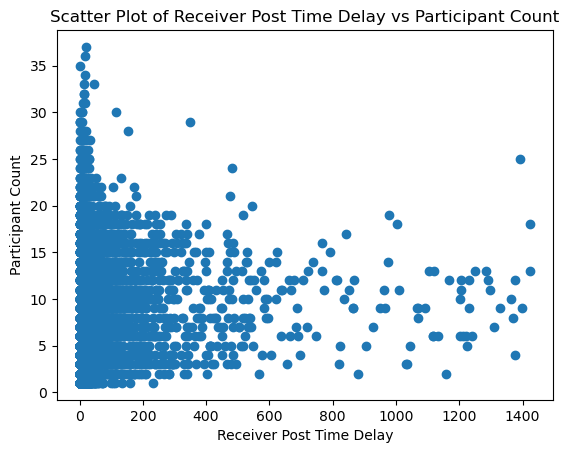

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(true_data['TimeDifferenceInMinutes'], true_data['Participant_count'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()


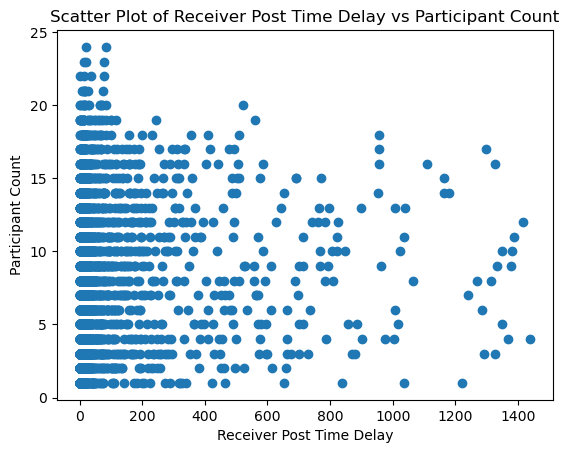

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns sender_tweet_id, receiver_post_time_delay, and Participant_count

# Create a scatter plot
plt.scatter(false_data['TimeDifferenceInMinutes'], false_data['Participant_count'])

# Add labels and title
plt.xlabel('Receiver Post Time Delay')
plt.ylabel('Participant Count')
plt.title('Scatter Plot of Receiver Post Time Delay vs Participant Count')

# Show the plot
plt.show()
